# Hackathon - Math & Stats ( Tim 4 - Stevo, Angela, Ivana)

In [1]:
# Loading the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3, venn2_circles, venn3_circles
import scipy.stats as stats
import random
import seaborn as sns
import statistics
import math
import numpy as np
from scipy.stats import skew
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

<!-- 1.) Од податоците кои ги прибирал Др. Игор Панчевски, сака да заклучи дали еден
лек, кој го даваат на пациенти во “Тхе Болница”, им помогнал. Пациентите кои
биле вклучени во испитувањето имаат покачен крвен притисок (се разгледува
само систола) и се претпоставува лекот дека го намалува покачениот притисок.
Приберени се податоци за 100 пациенти, дадени во “Prva_zadaca.csv”.
Колоната ‘Merenje 1’ претставува измерен притисок на прв ден од испитување.
Колоната ‘Merenje 2’ претставува измерен притисок после 6 месеци.
Колоната ‘Primil lek ili ne’ е категориска (0 или 1), односно кажува дали некој
пациент добил (или не) лек за намалување на крвниот притисок. -->

1.) Од податоците кои ги прибирал Др. Игор Панчевски, сака да заклучи дали еден
лек, кој го даваат на пациенти во “Тхе Болница”, им помогнал. Пациентите кои
биле вклучени во испитувањето имаат покачен крвен притисок (се разгледува
само систола) и се претпоставува лекот дека го намалува покачениот притисок.

Приберени се податоци за 100 пациенти, дадени во “Prva_zadaca.csv”. 

Колоната ‘Merenje 1’ претставува измерен притисок на прв ден од испитување.

Колоната ‘Merenje 2’ претставува измерен притисок после 6 месеци.

Колоната ‘Primil lek ili ne’ е категориска (0 или 1), односно кажува дали некој
пациент добил (или не) лек за намалување на крвниот притисок.

In [2]:
# Load the data

data = pd.read_csv('Prva_zadaca.csv')
data

,Unnamed: 0,Merenje 1,Merenje 2,Primil lek ili ne
0,0,151.354987,128.022177,1
1,1,140.893229,142.951676,0
2,2,149.398011,123.352114,1
3,3,145.447638,144.392613,0
4,4,146.130695,111.255393,1
...,...,...,...,...
95,95,171.349918,176.539961,0
96,96,137.475245,117.997604,1
97,97,162.832752,165.922771,0
98,98,138.662686,97.664238,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         100 non-null    int64  
 1   Merenje 1          100 non-null    float64
 2   Merenje 2          100 non-null    float64
 3   Primil lek ili ne  100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [4]:
data.describe()

,Unnamed: 0,Merenje 1,Merenje 2,Primil lek ili ne
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,149.383047,133.534419,0.500000
std,29.011492,11.442346,22.500510,0.502519
min,0.000000,119.488833,82.505925,0.000000
25%,24.750000,140.149544,116.704885,0.000000
50%,49.500000,150.708728,137.011075,0.500000
75%,74.250000,158.317202,151.804897,1.000000
max,99.000000,171.349918,176.539961,1.000000


а) Изберете начин на кој ќе ги визуелизирате податоците и напишете коментари за
нив (краток текстуален опис и коментари за plots).

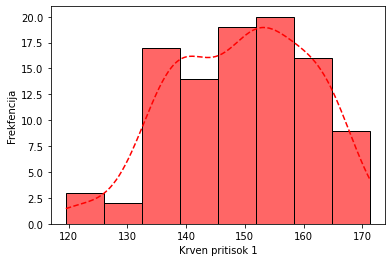

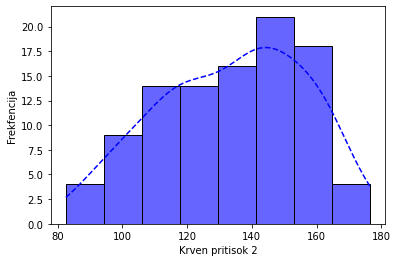

In [5]:
z1 = sns.histplot(data=data, x = "Merenje 1", color = "red", alpha = 0.6, kde = True, line_kws = {'color':'red','linestyle': 'dashed'})
z1.set_xlabel("Krven pritisok 1")
z1.set_ylabel("Frekfencija")
plt.show()

z2 = sns.histplot(data=data, x = "Merenje 2", color = "blue", alpha = 0.6, kde = True, line_kws = {'color':'blue','linestyle': 'dashed'})
z2.set_xlabel("Krven pritisok 2")
z2.set_ylabel("Frekfencija")
plt.show()

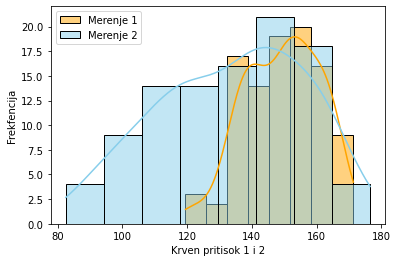

In [6]:
z1= sns.histplot(data=data, x="Merenje 1", label="Merenje 1", color="orange",kde = True)
z2= sns.histplot(data=data, x="Merenje 2", label="Merenje 2",color="skyblue", kde = True)
z1.set_xlabel("Krven pritisok 1 i 2")
z1.set_ylabel("Frekfencija")
plt.legend(loc='upper left')
plt.show()

### Zaklucok pod a - histogram

Na prviot den od merenjeto imame podatoci za krvniot pritisok koi sto se koncentrirani najmnogu od  130 do 170 mmHg.

Spored prviot histogram, se zabelezuva deka na prviot den od merenjeto vrednostite sledat normalna distribucija so najvisoka vrednost od 150 do 160mmHg.

Vo vtoriot histogram gledame deka podatocite od izmereniot pritisok na posledniot den (posle 6 meseci),normalnata rasperedelba  im e skoncentrirana okolu intervalot od 80 do 180 mmHg, kade najmnogu e izrazeno vo delot okolu 145mmHg.

Spored inicijalnata analiza mozeme da pretpostavime deka lekot deluva. Vo ovaa faza ne mozeme da doneseme sigurni zaklucoci bidejki krvniot pritisok zavisi od mnogu drugi faktori koi vlijaat na pacientot. So podlaboka analiza vo ponatamosnite cekori ke se dobie pojasna slika.

б) Категоризирајте ги податоците и направете Descriptive Statistics за
променливите кои се добиени.

In [7]:
# Centar of the data (mean, median, mode) - Merenje 1

mean_1=data['Merenje 1'].mean()
print('Mean for 1 is:',mean_1)
print ('------------------------------')
median_1=data['Merenje 1'].median()
print('Median for 1 is :',median_1)
print ('------------------------------')
mode_1 = data['Merenje 1'].mode()[0]
print('Mode for 1 is :',mode_1)

Mean for 1 is: 149.38304721420002
------------------------------
Median for 1 is : 150.7087284185807
------------------------------
Mode for 1 is : 119.48883255549268


In [8]:
# Centar of the data (mean, median, mode) - Merenje 2

mean_2=data['Merenje 2'].mean()
print('Mean for 2 is:',mean_2)
print ('------------------------------')
median_2=data['Merenje 2'].median()
print('Median for 2 is :',median_2)
print ('------------------------------')
mode_2 = data['Merenje 2'].mode()[0]
print('Mode for 2 is :',mode_2)

Mean for 2 is: 133.53441853698152
------------------------------
Median for 2 is : 137.01107452776515
------------------------------
Mode for 2 is : 82.50592531837464


In [9]:
# Variability (range,variance,standard deviation and interquartile range (IQR)) - Merenje 1

min_1=data['Merenje 1'].min()
print('Min for 1 is:',min_1)
print ('------------------------------')
max_1=data['Merenje 1'].max()
print('Max for 1 is:',max_1)
print ('------------------------------')
range_1= max_1-min_1
print('Range for 1 is:',range_1)
print ('------------------------------')
var_1=data['Merenje 1'].var()
print('Var for 1 is:',var_1)
print ('------------------------------')
std_1=data['Merenje 1'].std()
print('Std for 1 is:',std_1)
print ('------------------------------')
Q1_1 = np.percentile(data['Merenje 1'], 25)
print('Q1_1 for 1 is:',Q1_1)
print ('------------------------------')
Q3_1 = np.percentile(data['Merenje 1'], 75)
print('Q3_1 for 1 is:',Q3_1)
print ('------------------------------')
IQR_1 = Q3_1- Q1_1
print('IQR for 1 is:',IQR_1)
print ('------------------------------')
lowest_range_1 = Q1_1 -1.5*IQR_1
print('Lowest_range_1 for 1 is:',lowest_range_1)
print ('------------------------------')
higest_range_1 = Q3_1 +1.5*IQR_1
print('Higest_range_1 for 1 is:',higest_range_1)

Min for 1 is: 119.48883255549268
------------------------------
Max for 1 is: 171.34991848225175
------------------------------
Range for 1 is: 51.861085926759074
------------------------------
Var for 1 is: 130.9272725963022
------------------------------
Std for 1 is: 11.442345589795048
------------------------------
Q1_1 for 1 is: 140.14954356294868
------------------------------
Q3_1 for 1 is: 158.3172018979418
------------------------------
IQR for 1 is: 18.16765833499312
------------------------------
Lowest_range_1 for 1 is: 112.898056060459
------------------------------
Higest_range_1 for 1 is: 185.56868940043148


In [10]:
# Variability (range,variance,standard deviation and interquartile range (IQR)) - Merenje 2

min_2=data['Merenje 2'].min()
print('Min for 2 is:',min_2)
print ('------------------------------')
max_2=data['Merenje 2'].max()
print('Max for 2 is:',max_2)
print ('------------------------------')
range_2= max_2-min_2
print('Range for 2 is:',range_2)
print ('------------------------------')
var_2=data['Merenje 2'].var()
print('Var for 2 is:',var_2)
print ('------------------------------')
std_2=data['Merenje 2'].std()
print('Std for 2 is:',std_2)
print ('------------------------------')
Q1_2 = np.percentile(data['Merenje 2'], 25)
print('Q1_2 for 2 is:',Q1_2)
print ('------------------------------')
Q3_2 = np.percentile(data['Merenje 2'], 75)
print('Q3_2 for 2 is:',Q3_2)
print ('------------------------------')
IQR_2 = Q3_2- Q1_2
print('IQR for 2 is:',IQR_2)
print ('------------------------------')
lowest_range_2 = Q1_2 -1.5*IQR_2
print('Lowest_range_2 for 2 is:',lowest_range_2)
print ('------------------------------')
higest_range_2 = Q3_2 +1.5*IQR_2
print('Higest_range_2 for 2 is:',higest_range_2)

Min for 2 is: 82.50592531837464
------------------------------
Max for 2 is: 176.53996146912212
------------------------------
Range for 2 is: 94.03403615074748
------------------------------
Var for 2 is: 506.272958048521
------------------------------
Std for 2 is: 22.500510173072097
------------------------------
Q1_2 for 2 is: 116.70488466238825
------------------------------
Q3_2 for 2 is: 151.80489651164928
------------------------------
IQR for 2 is: 35.10001184926102
------------------------------
Lowest_range_2 for 2 is: 64.05486688849672
------------------------------
Higest_range_2 for 2 is: 204.4549142855408


In [11]:
# Skewness for Merenje 1 and Merenje 2

skew(data[['Merenje 1', 'Merenje 2']].dropna())
print('Skewness is:',skew(data[['Merenje 1', 'Merenje 2']], axis=0, bias=True))

Skewness is: [-0.27061946 -0.26336737]


Dobienite vrednosti od skewness se negativni, sto ni ukazuvaat deka nasite podatoci se raspredeleni na levata strana. Sto toa znaci deka levata opaska e podolga vo odnos na desnata.

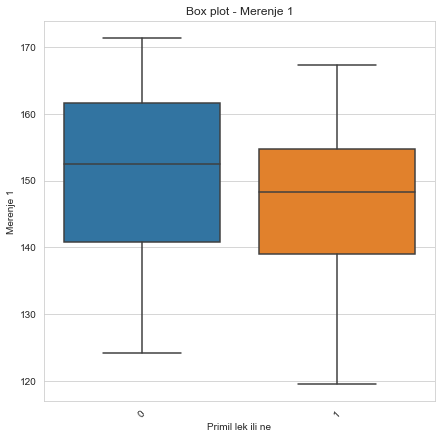

In [12]:
# Visualizing Merenje 1 with box plot

plt.figure(figsize=(7,7))
sns.set_style("whitegrid")
sns.boxplot(x='Primil lek ili ne', y='Merenje 1', data=data)
plt.title('Box plot - Merenje 1')
plt.xlabel('Primil lek ili ne')
plt.ylabel('Merenje 1')
plt.xticks(rotation=45)
plt.show()

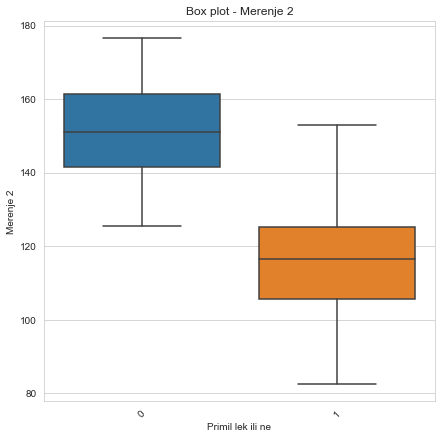

In [13]:
# Visualizing Merenje 2 with box plot

plt.figure(figsize=(7,7))
sns.set_style("whitegrid")
sns.boxplot(x='Primil lek ili ne', y='Merenje 2', data=data)
plt.title('Box plot - Merenje 2')
plt.xlabel('Primil lek ili ne')
plt.ylabel('Merenje 2')
plt.xticks(rotation=45)
plt.show()

In [14]:
primil_lek = data[(data['Primil lek ili ne'] ==1)]

In [15]:
ne_primil_lek = data[(data['Primil lek ili ne']==0)]

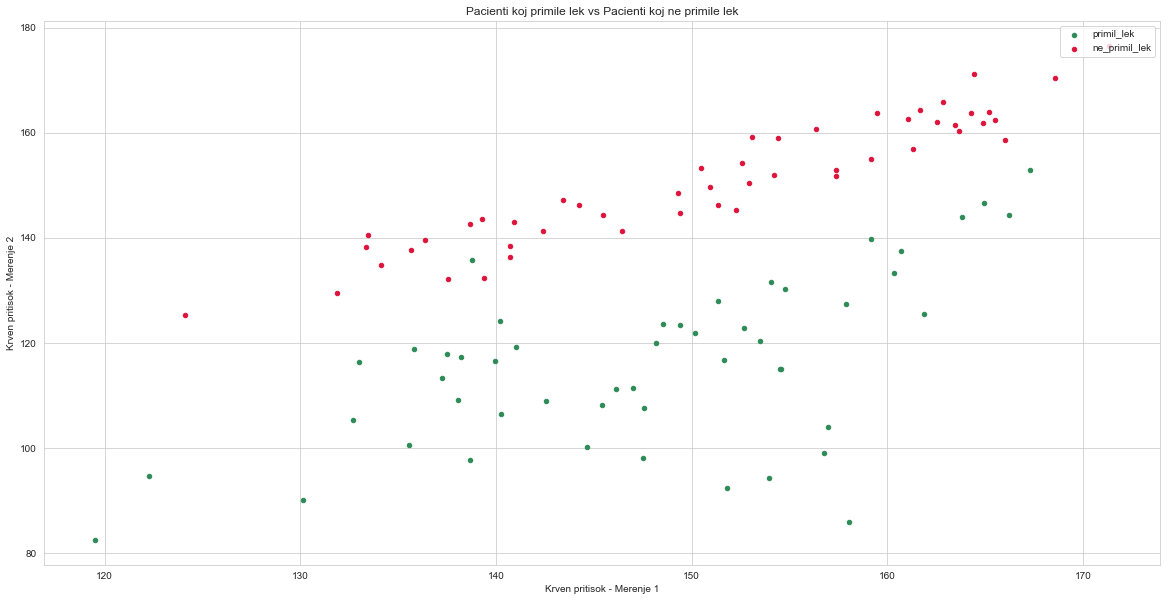

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
primil_lek.plot.scatter(x='Merenje 1', y='Merenje 2', c='seagreen',label='primil_lek', ax=ax)
ne_primil_lek .plot.scatter(x='Merenje 1', y='Merenje 2',c='crimson',label='ne_primil_lek', ax=ax)
plt.title('Pacienti koj primile lek vs Pacienti koj ne primile lek')
plt.xlabel('Krven pritisok - Merenje 1')
plt.ylabel('Krven pritisok - Merenje 2')
plt.legend(loc='upper right')
plt.show()

в) Направете тестови за групите:

в-1) Заклучете дали постои разлика на измерен крвен притисок на
пациентите прв ден и измерен крвен притисок на пациенти последен ден.

Sample 1 size is: 100
Sample 1 mean is: 149.38304721420002
Sample 1 std is: 11.442345589795048
Sample 1 standard error is: 1.1442345589795049
-------------------------------------------
Sample 2 size is: 100
Sample 2 mean is: 133.53441853698152
Sample 2 std is: 22.500510173072097
Sample 2 standard error is: 2.250051017307209


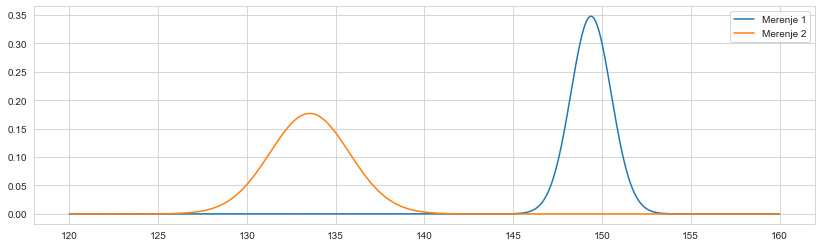

Statistics is : 6.278468622263965 
P-value is : 3.643033269815961e-09
Reject H0 in favor of Ha


In [17]:
# the sample

sample_1 = data['Merenje 1']
sample_2 = data['Merenje 2']

# hypotheses

# H0: mu_1 = mu_2
# Ha: mu_1 != mu_2

# Merenje 1

n_sample1 = len(sample_1)
mean_1 = sample_1.mean()
std_1 = sample_1.std(ddof = 1)
se_1 = stats.sem(sample_1)

print('Sample 1 size is:',n_sample1)
print('Sample 1 mean is:',mean_1)
print('Sample 1 std is:',std_1)
print('Sample 1 standard error is:',se_1)

print('-------------------------------------------')

# Merenje 2

n_sample2 = len(sample_2)
mean_2 = sample_2.mean()
std_2 = sample_2.std(ddof = 1)
se_2 = stats.sem(sample_2)

print('Sample 2 size is:',n_sample2)
print('Sample 2 mean is:',mean_2)
print('Sample 2 std is:',std_2)
print('Sample 2 standard error is:',se_2)

# student-t test

T_1 = stats.t(df=n_sample1-1, loc = mean_1, scale = se_1)
T_2 = stats.t(df=n_sample2-1, loc = mean_2, scale = se_2)

xs = np.linspace(120,160,1000)

plt.figure(figsize = (14,4))
plt.plot(xs, T_1.pdf(xs),label = 'Merenje 1')
plt.plot(xs, T_2.pdf(xs),label = 'Merenje 2')
plt.legend()
plt.show()

statistic,p_value=stats.ttest_ind(sample_1, sample_2, alternative = 'two-sided', equal_var = False)
print('Statistics is :',statistic,'\nP-value is :', p_value)

if p_value < 0.05:
    print('Reject H0 in favor of Ha')
else:
    print('Do not reject H0')

Zaklucok : Rezultatite od ovoj student-t test ni ukazuvaat, deka treba da se otfrli H0 hipoteza, so toa mozeme da kazeme deka postoi verojatnost deka ima razlika na izmereniot krven pritosok na prviot i posledniot den. 

в-2) Заклучете дали постои намалување (или зголемување) на притисокот
кај пациенти кои примиле лек во првиот ден од мерењето и на крајот од 6
месеци.

Sample 1 size is: 50
Sample 1 mean is: 147.6554325268705
Sample 1 std is: 11.03165585954921
Sample 1 standard error is: 1.5601117332007115
-------------------------------------------
Sample 2 size is: 50
Sample 2 mean is: 116.17033104000187
Sample 2 std is: 16.28645479179441
Sample 2 standard error is: 2.3032525249531934


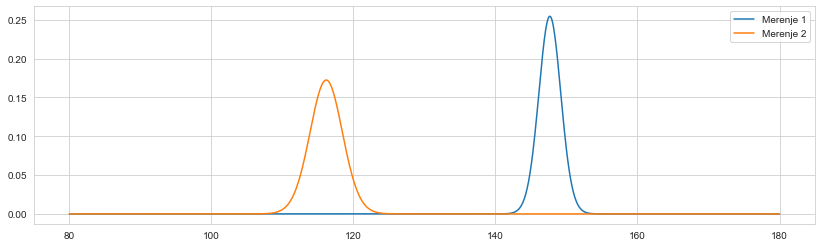

Statistics is : 11.317875078125734 
P-value is : 4.989747263327694e-19
Reject H0 in favor of Ha


In [18]:
# the sample

medication_data = data[data['Primil lek ili ne'] == 1]
sample_1 = medication_data['Merenje 1']
sample_2 = medication_data['Merenje 2']

# hypotheses

# H0: mu_1 = mu_2
# Ha: mu_1 > mu_2

# Merenje 1

n_sample1 = len(sample_1)
mean_1 = sample_1.mean()
std_1 = sample_1.std(ddof = 1)
se_1 = stats.sem(sample_1)

print('Sample 1 size is:',n_sample1)
print('Sample 1 mean is:',mean_1)
print('Sample 1 std is:',std_1)
print('Sample 1 standard error is:',se_1)

print('-------------------------------------------')

# Merenje 2

n_sample2 = len(sample_2)
mean_2 = sample_2.mean()
std_2 = sample_2.std(ddof = 1)
se_2 = stats.sem(sample_2)

print('Sample 2 size is:',n_sample2)
print('Sample 2 mean is:',mean_2)
print('Sample 2 std is:',std_2)
print('Sample 2 standard error is:',se_2)

# student-t test

T_1 = stats.t(df=n_sample1-1, loc = mean_1, scale = se_1)
T_2 = stats.t(df=n_sample2-1, loc = mean_2, scale = se_2)

xs = np.linspace(80,180,1000)

plt.figure(figsize = (14,4))
plt.plot(xs, T_1.pdf(xs),label = 'Merenje 1')
plt.plot(xs, T_2.pdf(xs),label = 'Merenje 2')
plt.legend()
plt.show()

statistic,p_value=stats.ttest_ind(sample_1, sample_2, alternative = 'greater', equal_var = False)
print('Statistics is :',statistic,'\nP-value is :', p_value)

if p_value < 0.05:
    print('Reject H0 in favor of Ha')
else:
    print('Do not reject H0')

Zaklucok : Rezultatite od ovoj student-t test ni ukazuvaat, deka treba da se otfrli H0 hipoteza, 
so toa mozeme da kazeme postoi verojatnost deka ima namaluvanje na krvniot pritisok kaj pacientite koi primile lek 
vo prviot i posledniot den.

в-3) Заклучете дали постои намалување (или зголемување) на притисокот
кај пациенти кои не примиле лек во првиот ден од мерењето и на крајот од 6
Месеци.

Sample 1 size is: 50
Sample 1 mean is: 151.11066190152954
Sample 1 std is: 11.69350126253935
Sample 1 standard error is: 1.6537108077110059
-------------------------------------------
Sample 2 size is: 50
Sample 2 mean is: 150.89850603396135
Sample 2 std is: 11.928945684423022
Sample 2 standard error is: 1.687007677172304


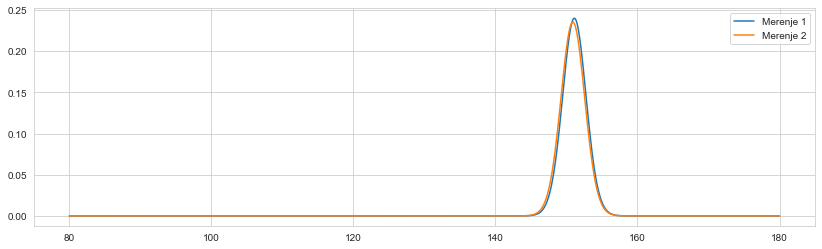

Statistics is : 0.08980667031551386 
P-value is : 0.46431210441094617
Do not reject H0


In [19]:
# the sample

medication_data = data[data['Primil lek ili ne'] == 0]
sample_1 = medication_data['Merenje 1']
sample_2 = medication_data['Merenje 2']

# hypotheses

# H0: mu_1 = mu_2
# Ha: mu_1 > mu_2

# Merenje 1

n_sample1 = len(sample_1)
mean_1 = sample_1.mean()
std_1 = sample_1.std(ddof = 1)
se_1 = stats.sem(sample_1)

print('Sample 1 size is:',n_sample1)
print('Sample 1 mean is:',mean_1)
print('Sample 1 std is:',std_1)
print('Sample 1 standard error is:',se_1)

print('-------------------------------------------')

# Merenje 2

n_sample2 = len(sample_2)
mean_2 = sample_2.mean()
std_2 = sample_2.std(ddof = 1)
se_2 = stats.sem(sample_2)

print('Sample 2 size is:',n_sample2)
print('Sample 2 mean is:',mean_2)
print('Sample 2 std is:',std_2)
print('Sample 2 standard error is:',se_2)

# student-t test

T_1 = stats.t(df=n_sample1-1, loc = mean_1, scale = se_1)
T_2 = stats.t(df=n_sample2-1, loc = mean_2, scale = se_2)

xs = np.linspace(80,180,1000)

plt.figure(figsize = (14,4))
plt.plot(xs, T_1.pdf(xs),label = 'Merenje 1')
plt.plot(xs, T_2.pdf(xs),label = 'Merenje 2')
plt.legend()
plt.show()

statistic,p_value=stats.ttest_ind(sample_1, sample_2, alternative = 'greater', equal_var = False)
print('Statistics is :',statistic,'\nP-value is :', p_value)

if p_value < 0.05:
    print('Reject H0 in favor of Ha')
else:
    print('Do not reject H0')

Zaklucok : Rezultatite od ovoj student-t test ni ukazuvaat, deka ne treba da se otfrli H0 hipoteza, 
so toa mozeme da kazeme postoi verojatnost deka nema namaluvanje na krvniot pritisok kaj pacientite koi ne primile lek 
vo prviot i posledniot den.

в-4) Дали постои разлика измеѓу пациентите што примиле лек и пациентите
што не примиле лек?

Sample 1 size is: 50
Sample 1 mean is: 150.89850603396135
Sample 1 std is: 11.928945684423022
Sample 1 standard error is: 1.687007677172304
-------------------------------------------
Sample 2 size is: 50
Sample 2 mean is: 116.17033104000187
Sample 2 std is: 16.28645479179441
Sample 2 standard error is: 2.3032525249531934


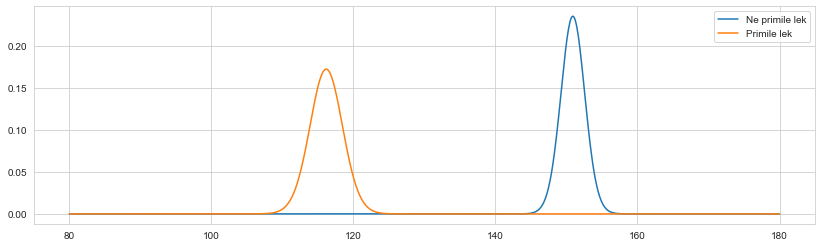

Statistics is : 12.164027441703155 P-value is : 1.0851781578326937e-20
Reject H0 in favor of Ha


In [20]:
# the sample

medication_data0 = data[data['Primil lek ili ne'] == 0]
medication_data1 = data[data['Primil lek ili ne'] == 1]
sample_1 = medication_data0['Merenje 2']
sample_2 = medication_data1['Merenje 2']

# hypotheses

# H0: mu_1 = mu_2
# Ha: mu_1 != mu_2

# Merenje 1

n_sample1 = len(sample_1)
mean_1 = sample_1.mean()
std_1 = sample_1.std(ddof = 1)
se_1 = stats.sem(sample_1)

print('Sample 1 size is:',n_sample1)
print('Sample 1 mean is:',mean_1)
print('Sample 1 std is:',std_1)
print('Sample 1 standard error is:',se_1)

print('-------------------------------------------')

# Merenje 2

n_sample2 = len(sample_2)
mean_2 = sample_2.mean()
std_2 = sample_2.std(ddof = 1)
se_2 = stats.sem(sample_2)

print('Sample 2 size is:',n_sample2)
print('Sample 2 mean is:',mean_2)
print('Sample 2 std is:',std_2)
print('Sample 2 standard error is:',se_2)

# student-t test

T_1 = stats.t(df=n_sample1-1, loc = mean_1, scale = se_1)
T_2 = stats.t(df=n_sample2-1, loc = mean_2, scale = se_2)

xs = np.linspace(80,180,1000)

plt.figure(figsize = (14,4))
plt.plot(xs, T_1.pdf(xs),label = 'Ne primile lek')
plt.plot(xs, T_2.pdf(xs),label = 'Primile lek')
plt.legend()
plt.show()

statistic,p_value=stats.ttest_ind(sample_1, sample_2, alternative = 'two-sided', equal_var = False)
print('Statistics is :',statistic,'P-value is :', p_value)

if p_value < 0.05:
    print('Reject H0 in favor of Ha')
else:
    print('Do not reject H0')

Zaklucok : Rezultatite od ovoj student-t test ni ukazuvaat, deka treba da se otfrli H0 hipoteza, 
so toa mozeme da kazeme postoi verojatnost deka ima razlika vo krvniot pritisok kaj pacientite koi primile lek i onie koi ne primile lek posledniot den.

2.) Др. Панчевски добил и втори податоци после првото испитување. Параметрите
на испитувањето биле сосема исти, но, податоците за дали некој пациент во
испитувањето примил лек или не ги загубиле.

а) Користејѓи ги податоците од ‘Prva_zadaca.csv’, конструирајте (истренирајте)
алгоритам за класификација на податоците. Категоризирајте ги пациентите во 2
групи - 0 (не примил лек) и 1 (примил лек). Потоа, за податоците од
‘Vtora_zadaca.csv’:

In [21]:
df = pd.read_csv('Prva_zadaca.csv')
display(df.head())

,Unnamed: 0,Merenje 1,Merenje 2,Primil lek ili ne
0,0,151.354987,128.022177,1
1,1,140.893229,142.951676,0
2,2,149.398011,123.352114,1
3,3,145.447638,144.392613,0
4,4,146.130695,111.255393,1


а-1) Категоризирајте ги пациентите само во однос на првото извршено
мерење.

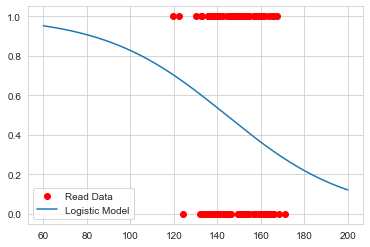

Training set accuracy with score_train: 0.56

Score_m1: 0.4



In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Alagoritam za klasifikacija na podatocite so edna nezavisna varijabla (Merenje 1)

X = df['Merenje 1'].to_numpy().reshape(-1,1)
y = df['Primil lek ili ne'].to_numpy()

# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=123)

# Build a logistic regressin model and train it

model = LogisticRegression()
model.fit(X_train, y_train)

# Plotting data and model on the same graph

xs = np.linspace(60, 200, 1000).reshape(-1, 1)
ys_logistic = model.predict_proba(xs)

plt.figure()
plt.scatter(X, y, label = 'Primil lek ili ne', color ='red')
plt.plot(xs, ys_logistic[:, 1], label = 'Logistic Model')
plt.legend()
plt.show()

# Evaluate the model

y_pred = model.predict(X_test)
score_train = model.score(X_train, y_train) 
# a good idea is to compare the two scores (on the training and the testing set). In a situatuin where the taining set accuracy is much higher might indicate overfitting
score_m1 = model.score(X_test, y_test)
p_pred = model.predict_proba(X_test)
conf_m = confusion_matrix(y_test, y_pred)


# print('p_pred:', p_pred, sep='\n', end='\n\n')
# print('y_pred:', y_pred, end='\n\n')
print('Training set accuracy with score_train:', score_train, end='\n\n')
print('Score_m1:', score_m1, end='\n\n')

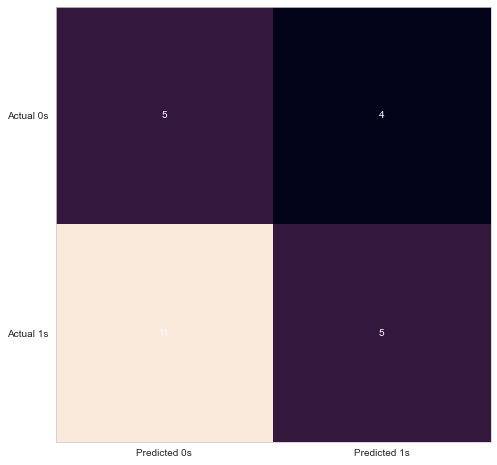

In [24]:
cm1 = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm1[i, j], ha='center', va='center', color='white')
plt.show()

а-2) Категоризирајте ги пациентите само во однос на второто извршено
мерење.

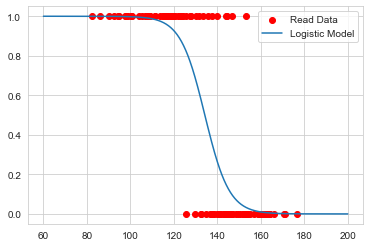

Training set accuracy with score_train: 0.92

Score_m2: 0.8



In [25]:
# Alagoritam za klasifikacija na podatocite so dve nezavisni varijabli (Merenje 2)

X = df['Merenje 2'].to_numpy().reshape(-1,1)
y = df['Primil lek ili ne'].to_numpy()

# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=123)

# Build a logistic regressin model and train it

model = LogisticRegression()
model.fit(X_train, y_train)

# Plotting data and model on the same graph

xs = np.linspace(60, 200, 1000).reshape(-1, 1)
ys_logistic = model.predict_proba(xs)

plt.figure()
plt.scatter(X, y, label = 'Primil lek ili ne', color ='red')
plt.plot(xs, ys_logistic[:, 1], label = 'Logistic Model')
plt.legend()
plt.show()

# Evaluate the model

y_pred = model.predict(X_test)
score_train = model.score(X_train, y_train) 
# a good idea is to compare the two scores (on the training and the testing set). In a situatuin where the taining set accuracy is much higher might indicate overfitting
score_m2 = model.score(X_test, y_test)
p_pred = model.predict_proba(X_test)
conf_m = confusion_matrix(y_test, y_pred)

# print('p_pred:', p_pred, sep='\n', end='\n\n')
# print('y_pred:', y_pred, end='\n\n')
print('Training set accuracy with score_train:', score_train, end='\n\n')
print('Score_m2:', score_m2, end='\n\n')

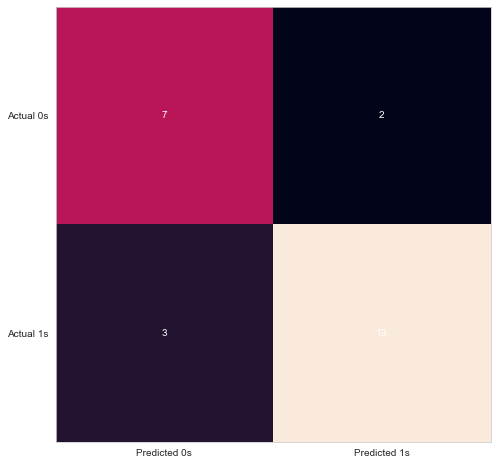

In [26]:
cm2 = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm2)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm2[i, j], ha='center', va='center', color='white')
plt.show()

а-3) Категоризирајте ги пациентите во однос на првото и второто мерење.

In [33]:
# Alagoritam za klasifikacija na podatocite so dve nezavisni varijabli (Merenje 1 i Merenje 2)
# Load the data

X = df[['Merenje 1','Merenje 2']].to_numpy()
y = df['Primil lek ili ne'].to_numpy()

# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=123)

# Build a logistic regressin model and train it

model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model

y_pred = model.predict(X_test)
score_train = model.score(X_train, y_train) # a good ide to compare the wo, as a situatuin where the taining set accuracy is much higher might indicate overfittins
score_m1_m2 = model.score(X_test, y_test)
p_pred = model.predict_proba(X_test)
conf_m = confusion_matrix(y_test, y_pred)

# print('p_pred:', p_pred, sep='\n', end='\n\n')
# print('y_pred:', y_pred, end='\n\n')
print('Training set accuracy with score_train:', score_train, end='\n\n')
print('Score Merenje 1, Merenje 2:', score_m1_m2, end='\n\n')

Training set accuracy with score_train: 0.9866666666666667

Score Merenje 1, Merenje 2: 0.96



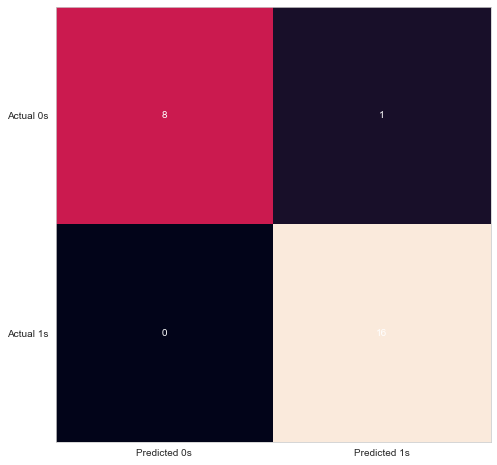

In [28]:
cm1_2 = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm1_2)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm1_2[i, j], ha='center', va='center', color='white')
plt.show()

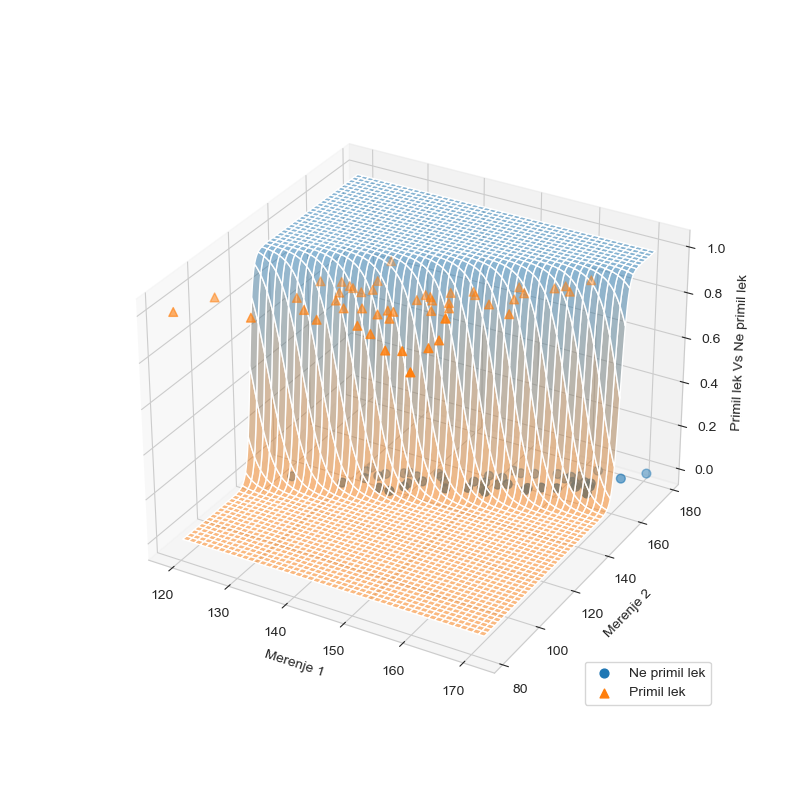

In [29]:
%matplotlib widget

# Color-coding data for the 3D scatter plot

xm0 = df.loc[df['Primil lek ili ne'] == 0]['Merenje 1']
ym0 = df.loc[df['Primil lek ili ne'] == 0]['Merenje 2']
zm0 = df.loc[df['Primil lek ili ne'] == 0]['Primil lek ili ne']

xm1 = df.loc[df['Primil lek ili ne'] == 1]['Merenje 1']
ym1 = df.loc[df['Primil lek ili ne'] == 1]['Merenje 2']
zm1 = df.loc[df['Primil lek ili ne'] == 1]['Primil lek ili ne']

# Creating the surface for the model

xs = np.linspace(X_train[:,0].min(), X_train[:,0].max(), 1000)
ys = np.linspace(X_train[:,1].min(), X_train[:,1].max(), 1000)
xs, ys = np.meshgrid(xs, ys)

b_0 = model.intercept_[0]
b_m1 = model.coef_[0][0]
b_m2= model.coef_[0][1]
zs = 1/(1 + np.exp(b_0 + b_m1*xs + b_m2*ys))

from matplotlib.colors import LinearSegmentedColormap
my_cmap = LinearSegmentedColormap.from_list('mycmap', ['tab:orange', 'tab:blue'])

fig = plt.figure(figsize=(8,8))
ax2 = fig.add_subplot(111, projection='3d')
ax2.plot_surface(xs, ys, zs, cmap=my_cmap, alpha=0.5)
ax2.scatter(xm0, ym0, zm0, marker='o', s=40, label = 'Ne primil lek')
ax2.scatter(xm1, ym1, zm1, marker='^', s=40, label = 'Primil lek')
ax2.set_xlabel('Merenje 1')
ax2.set_ylabel('Merenje 2')
ax2.set_zlabel('Primil lek Vs Ne primil lek')
ax2.legend(loc='lower right')
plt.show()

а-4) За категоризациите под а-1), а-2) и а-3), споредете ја прецизноста на
моделите, коментирајте (краток текстуален опис) и визуелизирајте ги
податоците (2D / 3D - соодветно во python, напишете коментари за plots).

In [30]:
print('Preciznost na model so nezavsina varijabla Merenje 1:', score_m1)
print('Preciznost na model so nezavsina varijabla Merenje 2:', score_m2)
print('Preciznost na model so nezavsina varijabla Merenje 1 i Merenje 2:', score_m1_m2)

Preciznost na model so nezavsina varijabla Merenje 1: 0.4
Preciznost na model so nezavsina varijabla Merenje 2: 0.8
Preciznost na model so nezavsina varijabla Merenje 1 i Merenje 2: 0.96


Soglasno dobienive rezultati mozeme da vidime deka Logistickiot model na regresija so dve varijabli ima preciznost 0,96
i e najprezicen od trite prilozeni modeli.
* Soodvetnite vizuelizaciite mozat da se vidat vo sklop na sekoj model zadaden pogore.

a) ** Категоризирајте ги пациентите во 2
групи - 0 (не примил лек) и 1 (примил лек). Потоа, за податоците од
‘Vtora_zadaca.csv’:

In [31]:
df2 = pd.read_csv('Vtora_zadaca.csv')
display(df2.head())

,Unnamed: 0,Merenje 1,Merenje 2
0,0,163.419762,156.977602
1,1,154.133336,127.545654
2,2,144.966965,144.371136
3,3,150.545838,150.807626
4,4,153.743813,148.645986


In [42]:
# defining x and predicting y 

X2 = df2[['Merenje 1','Merenje 2']].to_numpy()

# predicting y and probability 

y_pred2 = model.predict(X2)

df2['y_predict']=y_pred2
print(df2)

    Unnamed: 0   Merenje 1   Merenje 2  y_predict
0            0  163.419762  156.977602          0
1            1  154.133336  127.545654          1
2            2  144.966965  144.371136          0
3            3  150.545838  150.807626          0
4            4  153.743813  148.645986          0
..         ...         ...         ...        ...
95          95  153.006514  151.003056          0
96          96  143.406574  150.709426          0
97          97  151.069090  139.754312          1
98          98  140.135277  144.363428          0
99          99  154.120504  149.699120          0

[100 rows x 4 columns]


б) Бонус: Дали може да се категоризираат податоците со помош на линеарна
регресија? Кои колони би требало да се искористат за тренирање на моделот во
овој случај (на податоците од ‘Prva_zadaca.csv’’? Конструирајте линеарна
регресија за истата категоризација на пациентите од ‘Vtora_zadaca.csv’. Колку е
R2? Дали може да се подобри овој score? Од што зависи нашиот score во ова
сценарио?

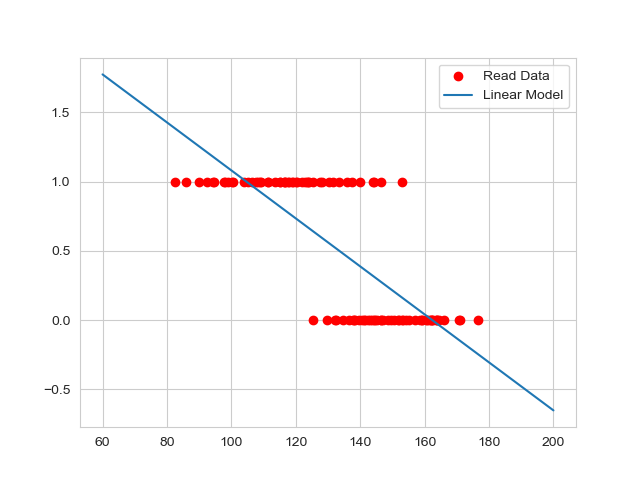

Correlation coefficent  0.7756075052386939
Determination coefficent 0.6015670021825906


In [55]:
X_lin = df['Merenje 2'].to_numpy().reshape(-1,1)
y_lin = df['Primil lek ili ne'].to_numpy()

# Build the model

model_lin = LinearRegression()
model_lin.fit(X_lin,y_lin)

xs = np.linspace(60, 200, 1000).reshape(-1, 1)
ys_lin = model_lin.predict(xs)

plt.figure()
plt.scatter(X_lin, y_lin,label = 'Read Data', color="red")
plt.plot(xs, ys_lin, label = 'Linear Model')
plt.legend()
plt.show()

r_sq = model_lin.score(X_lin, y_lin)
r = np.sqrt(r_sq)
print('Correlation coefficent ', r)
print('Determination coefficent', r_sq)

Ova ni dava nekakva merka, koja ni ja pretstava varijabilnosta na podatocite. Koeficientot r_sqrt zavisi od varijacijata na zavisnata varijabla, odnosno
nasiot slucaj od varijacijata na varijablata dali primil lek ili ne.